In [1]:
import joblib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos del GridSearchCV del archivo pickle
xgb_model = joblib.load("..\models\Step6_final_model.pkl")

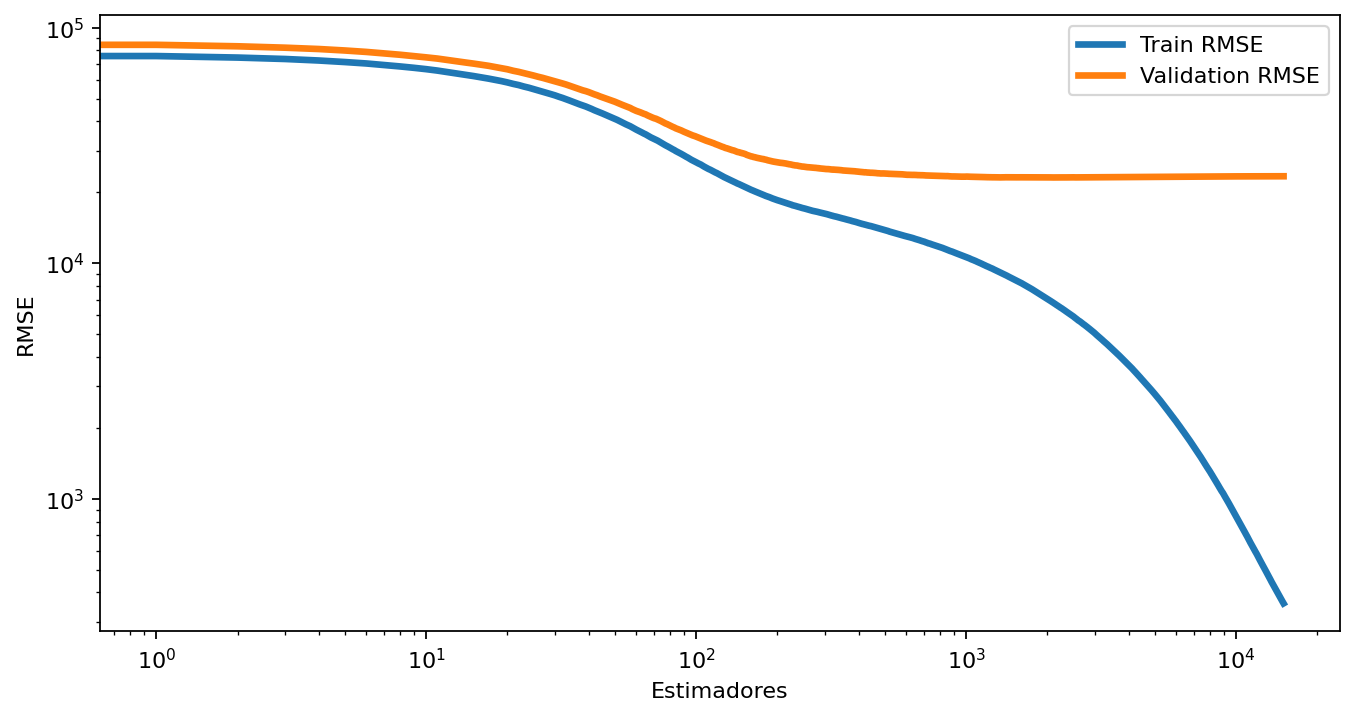

In [43]:
evals_result = xgb_model.evals_result()
train_rmse = evals_result["validation_0"]["rmse"]
val_rmse = evals_result["validation_1"]["rmse"]

# Graficar
plt.figure(figsize=(10, 5), dpi=160)
plt.plot(train_rmse, label="Train RMSE", lw=3)
plt.plot(val_rmse, label="Validation RMSE", lw=3)
plt.xlabel("Estimadores")
plt.ylabel("RMSE")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [24]:
min(val_rmse)

23104.572835595696

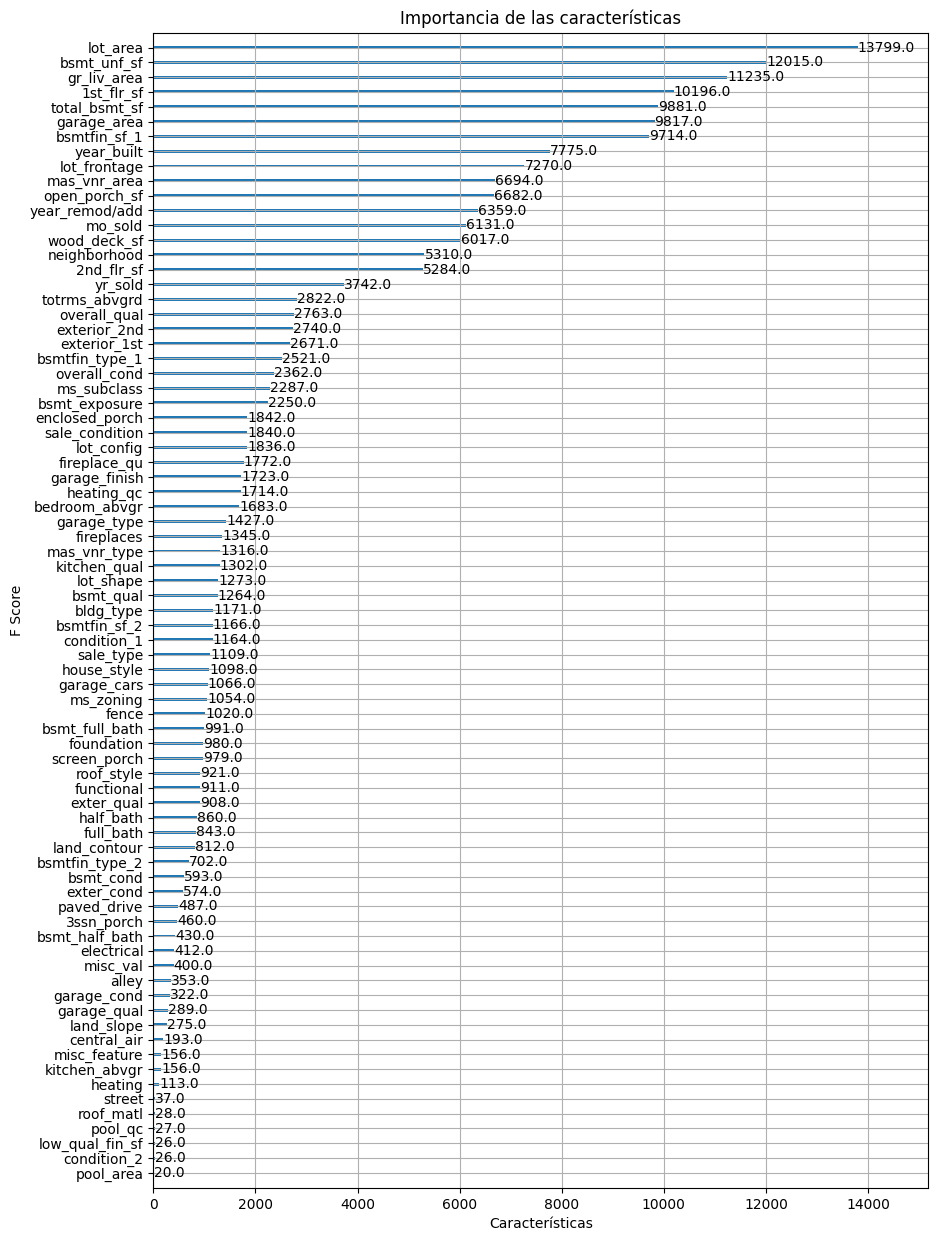

In [21]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Cargar el modelo desde el archivo pickle
xgb_model = joblib.load("..\models\Step6_final_model.pkl")

fig, ax = plt.subplots(figsize=(10, 15), dpi=100)
xgb.plot_importance(xgb_model, importance_type="weight", ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("F Score")
ax.set_xlabel("Características")
plt.show()

-------------

In [37]:
test_data = pd.read_csv("..\data\AmesHousing_test_set.csv")

x_test = test_data.drop(columns=["sale_price"])
y_test = test_data["sale_price"]

In [38]:
y_pred = xgb_model.predict(x_test)

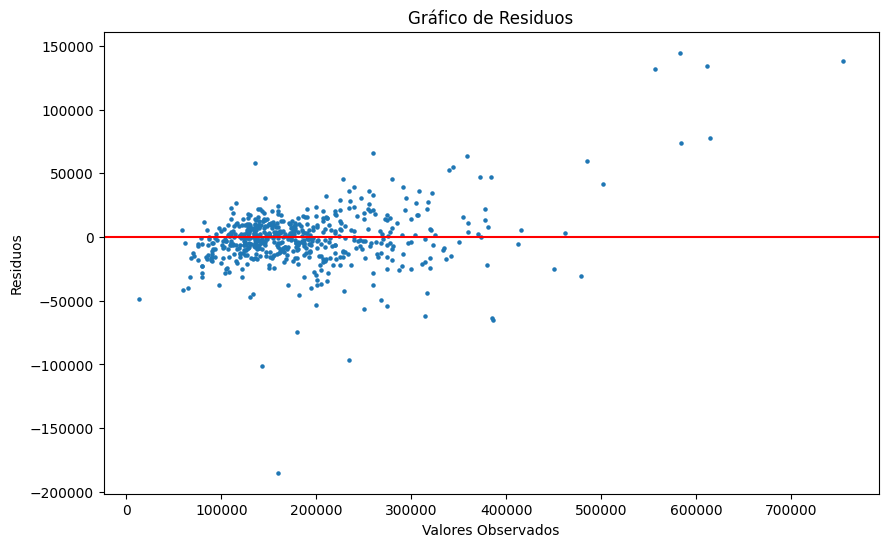

In [40]:
# Cargar los datos
test_data = pd.read_csv("..\data\AmesHousing_test_set.csv")

# Separar las variables independientes de la variable dependiente
x_test = test_data.drop(columns=["sale_price"])
y_test = test_data["sale_price"]

# Calcular los residuos
y_pred = xgb_model.predict(x_test)

# Calcular los residuos
residuos = y_test - y_pred

# Crear el gráfico de residuos
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(y_test, residuos, s=5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Observados')
plt.ylabel('Residuos')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 23389.332371691333
